## Mushroom with knn
Since I've finished mushroom with decision tree, so I won't do much elaboration in this notebook.<br />
So, firstly, let's import what we need.

In [52]:
import pandas as pd
import numpy as np
from sklearn import neighbors
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Have a nicer style of the plotsdf
import sklearn.metrics as metrics
from sklearn import model_selection

and then, read in or data and do some necessary processing.

In [53]:
df = pd.read_csv('./mushroom.csv')
Y = df['class']
X = df[df.columns[1:]]
X_dummy = pd.get_dummies(X)
Y_dummy = Y.apply(lambda x: 1 if x=='e' else 0)

### Knn training
We're now ready to do our training. <br />
First, let's build our training model.

In [58]:
def train_model(size=0.85, neighbor=2):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_dummy, Y_dummy, test_size=size, random_state=42)
    clf = neighbors.KNeighborsClassifier(n_neighbors=neighbor)
    clf.fit(X_train, Y_train)
    return (X_test, Y_test, clf)

OK, we're now ready to tune our parameters. Let's start with the size.

Text(0,0.5,'Value')

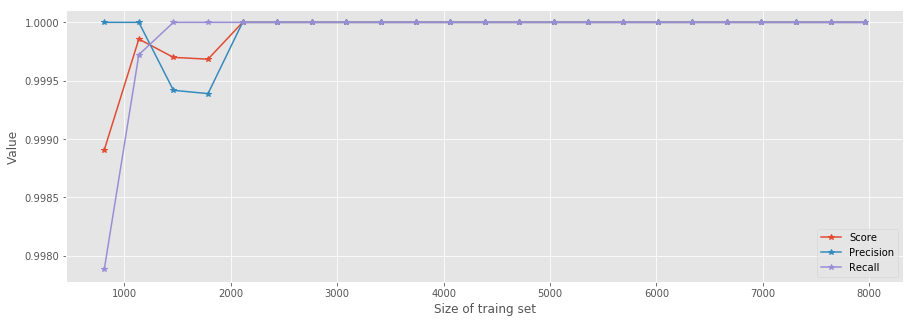

In [57]:
sizes = np.arange(0.9, 0.01, -0.04)
result = {}
for size in sizes:
    X_test, Y_test, clf = train_model(size)
    score = clf.score(X_test, Y_test)
    prediction = clf.predict(X_test)
    precision = metrics.precision_score(Y_test, prediction)
    recall = metrics.recall_score(Y_test, prediction)
    result[8124-len(Y_test)] = (score, precision, recall)
    
result = pd.DataFrame(result).transpose()
result.columns = ['Score', 'Precision', 'Recall']
result.plot(marker='*', figsize=(15,5))
plt.xlabel('Size of traing set')
plt.ylabel('Value')

Next, let's tune the n_neighbors.

Text(0,0.5,'Value')

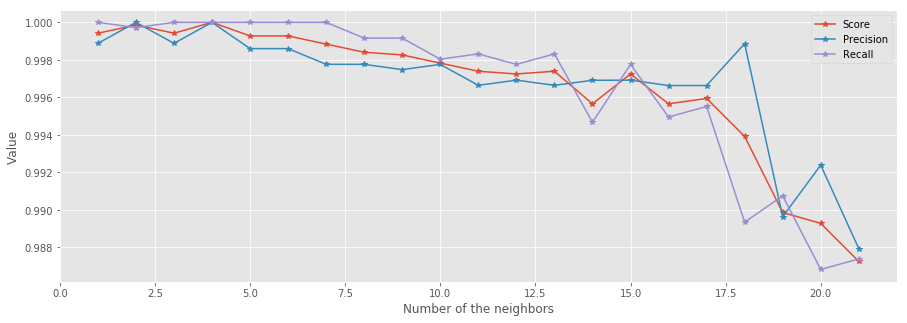

In [62]:
nbs = np.arange(1, 22, 1)
result = {}
for nb in nbs:
    X_test, Y_test, clf = train_model(neighbor=nb)
    score = clf.score(X_test, Y_test)
    prediction = clf.predict(X_test)
    precision = metrics.precision_score(Y_test, prediction)
    recall = metrics.recall_score(Y_test, prediction)
    result[nb] = (score, precision, recall)
    
result = pd.DataFrame(result).transpose()
result.columns = ['Score', 'Precision', 'Recall']
result.plot(marker='*', figsize=(15,5))
plt.xlabel('Number of the neighbors')
plt.ylabel('Value')

Now, we figured out our best n_neighbors(4) and the size() of our traning set and testing set.<br />
Let's do our final check!

In [63]:
def final_test():
    X_test, Y_test, clf = train_model(size=0.75, neighbor=4)
    score = clf.score(X_test, Y_test)
    prediction = clf.predict(X_test)
    precision = metrics.precision_score(Y_test, prediction)
    recall = metrics.recall_score(Y_test, prediction)
    return(score, precision, recall)

In [64]:
accuracy, precision, recall = final_test()
print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)

accuracy:  1.0
precision:  1.0
recall:  1.0
